<a href="https://colab.research.google.com/github/vsmeloda/Challenge_data_science_alura/blob/main/Challenge_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 1**


## **Importanto Arquivo**

In [143]:
# import urllib library
from urllib.request import urlopen

# import json
import json
# store the URL in url as
# parameter for urlopen
url = "https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json"

# store the response of URL
response = urlopen(url)

# storing the JSON response
# from url in data
data_json = json.loads(response.read())

# print the json response
print(data_json)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [144]:
##Importando bibliotecas de dados
import pandas as pd
import numpy as np


In [145]:
df = pd.DataFrame(data_json)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Tratamento dos Dados 1**

### **Normalizando Dados**

In [146]:
##Normalizando dados
for a in df.customer[1].keys():
  for y in range(len(df)):
    x=df.customer[y][a]
    df.loc[y,a]=x
for a in df.phone[1].keys():
  for y in range(len(df)):
    x=df.phone[y][a]
    df.loc[y,a]=x
for a in df.internet[1].keys():
  for y in range(len(df)):
    x=df.internet[y][a]
    df.loc[y,a]=x
for a in df.account[1].keys():
  if a=='Charges':
   for b in df.account[1][a]:
    for y in range(len(df)):
     x=df.account[y][a][b]
     df.loc[y,b]= x
  else:
   for y in range(len(df)):
    x=df.account[y][a]
    df.loc[y,a]= x

df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0.0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1.0,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1.0,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [147]:
#Excluindo colunas com dicionários
df_tratado=df.drop(columns=['customer','phone','internet','account'])
df_tratado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [148]:
#Verificando tipo de dados
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   float64
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   float64
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [149]:
#Verificando contagem de valores das colunas execeto customerID para detecção de dados incosistentes
for a in df_tratado.columns[1:]:
  x=df_tratado[a].value_counts()
  print( x )
  print('-----')

No     5174
Yes    1869
        224
Name: Churn, dtype: int64
-----
Male      3675
Female    3592
Name: gender, dtype: int64
-----
0.0    6085
1.0    1182
Name: SeniorCitizen, dtype: int64
-----
No     3749
Yes    3518
Name: Partner, dtype: int64
-----
No     5086
Yes    2181
Name: Dependents, dtype: int64
-----
1.0     634
72.0    369
2.0     246
3.0     207
4.0     185
       ... 
38.0     60
39.0     59
44.0     54
36.0     50
0.0      11
Name: tenure, Length: 73, dtype: int64
-----
Yes    6560
No      707
Name: PhoneService, dtype: int64
-----
No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64
-----
Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64
-----
No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64
-----
No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, 

In [150]:
#Adicionando dados nulos em celulas vazia
df_tratado=df_tratado.replace('',np.NaN)

In [151]:
#Verificando presença de dados nulos
df_tratado.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Monthly               0
Total                 0
dtype: int64

In [152]:
#Identificado que não foi corrigido os vazios em dados nulos na coluna total
##Corrigindo e verificando o erro
df_tratado['Total'] = df_tratado['Total'].replace(' ',np.NaN)
df_tratado.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Monthly               0
Total                11
dtype: int64

In [153]:
#Verificando contagem de valores das colunas execeto customerID
for a in df_tratado.columns[1:]:
  x=df_tratado[a].value_counts()
  print( x )
  print('-----')

No     5174
Yes    1869
Name: Churn, dtype: int64
-----
Male      3675
Female    3592
Name: gender, dtype: int64
-----
0.0    6085
1.0    1182
Name: SeniorCitizen, dtype: int64
-----
No     3749
Yes    3518
Name: Partner, dtype: int64
-----
No     5086
Yes    2181
Name: Dependents, dtype: int64
-----
1.0     634
72.0    369
2.0     246
3.0     207
4.0     185
       ... 
38.0     60
39.0     59
44.0     54
36.0     50
0.0      11
Name: tenure, Length: 73, dtype: int64
-----
Yes    6560
No      707
Name: PhoneService, dtype: int64
-----
No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64
-----
Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64
-----
No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64
-----
No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, dtype: int64

### **Traduzindo Dados**

In [154]:
#Criando dicionário com os nomes
traducao=  {
     'customerID': 'ID',
     'gender': 'Genero',
     'SeniorCitizen': 'Cidadao_senior',
     'Partner':'Casado',
     'Dependents':'Depedentes',
     'tenure':'Meses_contrato',
     'PhoneService':'Servico_Telefonico',
     'MultipleLines':'Multiplas_linhas',
     'InternetService':'Servico_internet',
     'OnlineSecurity':'Seguranca_online',
     'DeviceProtection':'Protecao_dispositivo',
     'TechSupport':'Suporte_tecnico',
     'StreamingMovies':'Streaming_filmes',
     'Contract':'Contrato',
     'PaperlessBilling':'Recebimento_Online',
     'PaymentMethod':'Metodo_de_Pagamento',
     'Monthly':'Pagamento_mensal',
     'Total':'Pagamento_total'
}

In [155]:
#Traduzindo titulos das colunas
df_tratado.rename(columns = traducao, inplace = True)
df_tratado


,ID,Churn,Genero,Cidadao_senior,Casado,Depedentes,Meses_contrato,Servico_Telefonico,Multiplas_linhas,Servico_internet,...,OnlineBackup,Protecao_dispositivo,Suporte_tecnico,StreamingTV,Streaming_filmes,Contrato,Recebimento_Online,Metodo_de_Pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0.0,No,No,13.0,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0.0,Yes,No,22.0,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0.0,No,No,2.0,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0.0,Yes,Yes,67.0,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [156]:
#Verificando itens nas colunas
for a in df_tratado.columns[1:]:
  print(a,list(df_tratado[a].unique()))

Churn ['No', 'Yes', nan]
Genero ['Female', 'Male']
Cidadao_senior [0.0, 1.0]
Casado ['Yes', 'No']
Depedentes ['Yes', 'No']
Meses_contrato [9.0, 4.0, 13.0, 3.0, 71.0, 63.0, 7.0, 65.0, 54.0, 72.0, 5.0, 56.0, 34.0, 1.0, 45.0, 50.0, 23.0, 55.0, 26.0, 69.0, 11.0, 37.0, 49.0, 66.0, 67.0, 20.0, 43.0, 59.0, 12.0, 27.0, 2.0, 25.0, 29.0, 14.0, 35.0, 64.0, 39.0, 40.0, 6.0, 30.0, 70.0, 57.0, 58.0, 16.0, 32.0, 33.0, 10.0, 21.0, 61.0, 15.0, 44.0, 22.0, 24.0, 19.0, 47.0, 62.0, 46.0, 52.0, 8.0, 60.0, 48.0, 28.0, 41.0, 53.0, 68.0, 51.0, 31.0, 36.0, 17.0, 18.0, 38.0, 42.0, 0.0]
Servico_Telefonico ['Yes', 'No']
Multiplas_linhas ['No', 'Yes', 'No phone service']
Servico_internet ['DSL', 'Fiber optic', 'No']
Seguranca_online ['No', 'Yes', 'No internet service']
OnlineBackup ['Yes', 'No', 'No internet service']
Protecao_dispositivo ['No', 'Yes', 'No internet service']
Suporte_tecnico ['Yes', 'No', 'No internet service']
StreamingTV ['Yes', 'No', 'No internet service']
Streaming_filmes ['No', 'Yes', 'No inte

In [157]:
#Criando dicionários de tradução
Genero = {'Female':'Feminino', 'Male':'Masculino'}
sim_nao = {'Yes':'Sim', 'No':'Não'}
Multiplas_linhas ={'Yes':'Sim', 'No':'Não','No phone service':'Sem serviço telefonico'}
sim_nao_internet ={'Yes':'Sim', 'No':'Não', 'No internet service':'Sem serviço de internet'}
Contrato = {'One year':'Anual', 'Month-to-month':'Mensal', 'Two year':'Bianual'}
Pagamento ={'Mailed check':'Cheque enviado', 'Electronic check':'Cheque Eletronico', 'Credit card (automatic)':'Cartão de Crédito(automático)', 'Bank transfer (automatic)':'Transferência Bancária'}
Servico_internet = {'DSL':'DSL', 'Fiber optic':'Fibra ótica', 'No':'Não'}

In [158]:
#Traduzindo itens nas colunas
for a in df_tratado.columns:
 if a not in ['ID','Cidadao_senior','Meses_contrato','Pagamento_mensal','Pagamento_total']:
  if a=='Genero':
    df_tratado[a]= df_tratado[a].map(Genero)
  elif a in ['Seguranca_online','Suporte_tecnico','StreamingTV','Streaming_filmes','OnlineBackup','Protecao_dispositivo']:
    df_tratado[a] = df_tratado[a].map(sim_nao_internet)
  elif a=='Servico_internet':
    df_tratado[a] = df_tratado[a].map(Servico_internet)
  elif a=='Contrato':
    df_tratado[a] = df_tratado[a].map(Contrato)
  elif a=='Metodo_de_Pagamento':
    df_tratado[a] = df_tratado[a].map(Pagamento)
  elif a=='Multiplas_linhas':
    df_tratado[a] = df_tratado[a].map(Multiplas_linhas)
  else:
    df_tratado[a] = df_tratado[a].map(sim_nao)

In [159]:
#Verificando tradução
for a in df_tratado.columns[1:]:
  print(a,list(df_tratado[a].unique()))

Churn ['Não', 'Sim', nan]
Genero ['Feminino', 'Masculino']
Cidadao_senior [0.0, 1.0]
Casado ['Sim', 'Não']
Depedentes ['Sim', 'Não']
Meses_contrato [9.0, 4.0, 13.0, 3.0, 71.0, 63.0, 7.0, 65.0, 54.0, 72.0, 5.0, 56.0, 34.0, 1.0, 45.0, 50.0, 23.0, 55.0, 26.0, 69.0, 11.0, 37.0, 49.0, 66.0, 67.0, 20.0, 43.0, 59.0, 12.0, 27.0, 2.0, 25.0, 29.0, 14.0, 35.0, 64.0, 39.0, 40.0, 6.0, 30.0, 70.0, 57.0, 58.0, 16.0, 32.0, 33.0, 10.0, 21.0, 61.0, 15.0, 44.0, 22.0, 24.0, 19.0, 47.0, 62.0, 46.0, 52.0, 8.0, 60.0, 48.0, 28.0, 41.0, 53.0, 68.0, 51.0, 31.0, 36.0, 17.0, 18.0, 38.0, 42.0, 0.0]
Servico_Telefonico ['Sim', 'Não']
Multiplas_linhas ['Não', 'Sim', 'Sem serviço telefonico']
Servico_internet ['DSL', 'Fibra ótica', 'Não']
Seguranca_online ['Não', 'Sim', 'Sem serviço de internet']
OnlineBackup ['Sim', 'Não', 'Sem serviço de internet']
Protecao_dispositivo ['Não', 'Sim', 'Sem serviço de internet']
Suporte_tecnico ['Sim', 'Não', 'Sem serviço de internet']
StreamingTV ['Sim', 'Não', 'Sem serviço de intern

### **Convertendo tipos de dados**

In [160]:
#Verificando tipos de dados
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7267 non-null   object 
 1   Churn                 7043 non-null   object 
 2   Genero                7267 non-null   object 
 3   Cidadao_senior        7267 non-null   float64
 4   Casado                7267 non-null   object 
 5   Depedentes            7267 non-null   object 
 6   Meses_contrato        7267 non-null   float64
 7   Servico_Telefonico    7267 non-null   object 
 8   Multiplas_linhas      7267 non-null   object 
 9   Servico_internet      7267 non-null   object 
 10  Seguranca_online      7267 non-null   object 
 11  OnlineBackup          7267 non-null   object 
 12  Protecao_dispositivo  7267 non-null   object 
 13  Suporte_tecnico       7267 non-null   object 
 14  StreamingTV           7267 non-null   object 
 15  Streaming_filmes     

In [161]:
#Convertendo os tipos de dados
df_tratado = df_tratado.convert_dtypes()
df_tratado['Pagamento_total'] = df_tratado['Pagamento_total'].astype(float)
df_tratado['Cidadao_senior'] = df_tratado['Cidadao_senior'].astype(bool)
df_tratado['Meses_contrato'] = df_tratado['Meses_contrato'].astype(float)
df_tratado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7267 non-null   string 
 1   Churn                 7043 non-null   string 
 2   Genero                7267 non-null   string 
 3   Cidadao_senior        7267 non-null   bool   
 4   Casado                7267 non-null   string 
 5   Depedentes            7267 non-null   string 
 6   Meses_contrato        7267 non-null   float64
 7   Servico_Telefonico    7267 non-null   string 
 8   Multiplas_linhas      7267 non-null   string 
 9   Servico_internet      7267 non-null   string 
 10  Seguranca_online      7267 non-null   string 
 11  OnlineBackup          7267 non-null   string 
 12  Protecao_dispositivo  7267 non-null   string 
 13  Suporte_tecnico       7267 non-null   string 
 14  StreamingTV           7267 non-null   string 
 15  Streaming_filmes     

### **Tratamento dos dados nulos adicionados**

In [162]:
#Verificando dados nulos
df_tratado.isnull().sum()

ID                        0
Churn                   224
Genero                    0
Cidadao_senior            0
Casado                    0
Depedentes                0
Meses_contrato            0
Servico_Telefonico        0
Multiplas_linhas          0
Servico_internet          0
Seguranca_online          0
OnlineBackup              0
Protecao_dispositivo      0
Suporte_tecnico           0
StreamingTV               0
Streaming_filmes          0
Contrato                  0
Recebimento_Online        0
Metodo_de_Pagamento       0
Pagamento_mensal          0
Pagamento_total          11
dtype: int64

In [163]:
## Verificando se existe linhas com dados nulos em Churn e Total
df_nulo = df_tratado[df_tratado['Churn'].isnull()]
df_nulo['Pagamento_total'].isnull().sum()

0

In [164]:
##Verificando se os Pagamento_total nulos tem Meses_contrato  maior que 0
df_tratado[(df_tratado['Pagamento_total'].isnull())].where(df_tratado['Meses_contrato']>0).count()

ID                      0
Churn                   0
Genero                  0
Cidadao_senior          0
Casado                  0
Depedentes              0
Meses_contrato          0
Servico_Telefonico      0
Multiplas_linhas        0
Servico_internet        0
Seguranca_online        0
OnlineBackup            0
Protecao_dispositivo    0
Suporte_tecnico         0
StreamingTV             0
Streaming_filmes        0
Contrato                0
Recebimento_Online      0
Metodo_de_Pagamento     0
Pagamento_mensal        0
Pagamento_total         0
dtype: int64

In [165]:
#Deletando dados nulos do DF todos os dados nulos
df_tratado=df_tratado.dropna()

In [166]:
#Verificando os dados nulos na coluna total
df_tratado.isnull().sum()

ID                      0
Churn                   0
Genero                  0
Cidadao_senior          0
Casado                  0
Depedentes              0
Meses_contrato          0
Servico_Telefonico      0
Multiplas_linhas        0
Servico_internet        0
Seguranca_online        0
OnlineBackup            0
Protecao_dispositivo    0
Suporte_tecnico         0
StreamingTV             0
Streaming_filmes        0
Contrato                0
Recebimento_Online      0
Metodo_de_Pagamento     0
Pagamento_mensal        0
Pagamento_total         0
dtype: int64

In [167]:
#Verificando tamanho do dataset
df_tratado.shape

(7032, 21)

### **Avaliando Serviço de Internet**

In [168]:
#Verificando se existe incositencia nas informações baseado na não existencia de serviço de internet
df_servico = df_tratado[df_tratado['Servico_internet']=='Não']
for a in df_servico.columns[1:]:
  print(a,list(df_servico[a].unique()))

Churn ['Não', 'Sim']
Genero ['Feminino', 'Masculino']
Cidadao_senior [True, False]
Casado ['Sim', 'Não']
Depedentes ['Não', 'Sim']
Meses_contrato [50.0, 3.0, 4.0, 54.0, 26.0, 69.0, 49.0, 67.0, 43.0, 12.0, 25.0, 27.0, 1.0, 10.0, 44.0, 24.0, 71.0, 2.0, 46.0, 30.0, 8.0, 23.0, 5.0, 63.0, 32.0, 16.0, 9.0, 15.0, 40.0, 65.0, 70.0, 72.0, 48.0, 52.0, 41.0, 11.0, 57.0, 18.0, 20.0, 28.0, 29.0, 38.0, 13.0, 59.0, 53.0, 56.0, 6.0, 61.0, 7.0, 62.0, 58.0, 36.0, 47.0, 37.0, 19.0, 55.0, 64.0, 17.0, 14.0, 35.0, 66.0, 33.0, 22.0, 60.0, 31.0, 42.0, 51.0, 68.0, 34.0, 39.0, 21.0, 45.0]
Servico_Telefonico ['Sim']
Multiplas_linhas ['Sim', 'Não']
Servico_internet ['Não']
Seguranca_online ['Sem serviço de internet']
OnlineBackup ['Sem serviço de internet']
Protecao_dispositivo ['Sem serviço de internet']
Suporte_tecnico ['Sem serviço de internet']
StreamingTV ['Sem serviço de internet']
Streaming_filmes ['Sem serviço de internet']
Contrato ['Anual', 'Mensal', 'Bianual']
Recebimento_Online ['Não', 'Sim']
Metodo_d

In [169]:
##Não foi detectado incosisitencia.

##  **Análise** **Explorátória - Dados Normalizadados**

####**Análise estatistica dos dados**

In [170]:
#Verificando informações das colunas do tipo string e bool, descrição e contagem.
for a in list(df_tratado.select_dtypes(include=('string','bool')).columns[1:]):
  x=df_tratado[a].describe()
  y=df_tratado[a].value_counts()
  print(f'Coluna: {a}\n\nDescrição:\n{x} \n\nContagem:\n{y} \n------')



Coluna: Churn

Descrição:
count     7032
unique       2
top        Não
freq      5163
Name: Churn, dtype: object 

Contagem:
Não    5163
Sim    1869
Name: Churn, dtype: Int64 
------
Coluna: Genero

Descrição:
count          7032
unique            2
top       Masculino
freq           3549
Name: Genero, dtype: object 

Contagem:
Masculino    3549
Feminino     3483
Name: Genero, dtype: Int64 
------
Coluna: Cidadao_senior

Descrição:
count      7032
unique        2
top       False
freq       5890
Name: Cidadao_senior, dtype: object 

Contagem:
False    5890
True     1142
Name: Cidadao_senior, dtype: int64 
------
Coluna: Casado

Descrição:
count     7032
unique       2
top        Não
freq      3639
Name: Casado, dtype: object 

Contagem:
Não    3639
Sim    3393
Name: Casado, dtype: Int64 
------
Coluna: Depedentes

Descrição:
count     7032
unique       2
top        Não
freq      4933
Name: Depedentes, dtype: object 

Contagem:
Não    4933
Sim    2099
Name: Depedentes, dtype: Int64 
----

In [171]:
#Verificando informações estatisticas das colunas numéricas (float e int)
df_tratado.describe(include=('float','int')).round(2)

,Meses_contrato,Pagamento_mensal,Pagamento_total
count,7032.00,7032.0,7032.00
mean,32.42,64.8,2283.30
std,24.55,30.09,2266.77
min,1.00,18.25,18.80
25%,9.00,35.59,401.45
50%,29.00,70.35,1397.48
75%,55.00,89.86,3794.74
max,72.00,118.75,8684.80


### **Analisando parâmetro Meses de Contrato**

Classificação de tempo de contrato
- <6 = <6 meses
-  6<12 = 6 a 12 meses
- 12x< 12x+12 = x a x+1 anos


In [172]:
## Verificando descrição do item classificação de Meses Contrato
df_tratado['Meses_contrato'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Meses_contrato, dtype: float64

In [173]:
#Adicionando classificação de tempo de contrato baseado nos meses de contrato
tempo_ano =[]
for a in (df_tratado.index):
   x = df_tratado['Meses_contrato'].loc[a]
   y = x/12
   if y//1 == y:
    tempo_ano.append(f'{y} a {y+1} anos')
   elif x<6:
    tempo_ano.append('< 6 meses')
   else:
     tempo_ano.append('6 a 12 meses')
#Adicionando no dataframe
df_tratado['tempo_ano']=tempo_ano

#Convertendo para string
df_tratado = df_tratado.convert_dtypes()


### **Criando taxas de churn por parâmetro**

- Taxa_churn_clientes = churn/total_cliente_na_categoria
- Taxa_churn_churn = churn/total_clientes_churn

In [174]:
#Criação do DataFrame
df_est = pd.DataFrame()

#Adicionando coluna Churn e defindo como index
df_est["Churn"]= ['Total','Sim','Não','Taxa_c_clientes','Taxa_c_churn']
df_est = df_est.set_index(df_est.columns[0])

#Adicionando dados do df_tratado

for a in (df_tratado.select_dtypes(include=('string','bool')).columns)[2:19]:
  Total_churn=len(df_tratado[df_tratado['Churn']=='Sim'])
  for b in (df_tratado[a].unique()):
    Yes = df_tratado[a].where((df_tratado['Churn']=='Sim') & (df_tratado[a]==b)).count()
    No = df_tratado[a].where((df_tratado['Churn']=='Não') & (df_tratado[a]==b)).count()
    Total = No+Yes
    Razao = Yes/Total*100
    Razao2= Yes/Total_churn*100
    df_est[f'{a}.{b}'] =np.round([Total,Yes,No,Razao,Razao2],2)

#Visualiznado coluna
df_est.T.sort_values(by='Taxa_c_clientes', ascending=False)

Churn,Total,Sim,Não,Taxa_c_clientes,Taxa_c_churn
tempo_ano.< 6 meses,1360.0,744.0,616.0,54.71,39.81
Metodo_de_Pagamento.Cheque Eletronico,2365.0,1071.0,1294.0,45.29,57.30
Contrato.Mensal,3875.0,1655.0,2220.0,42.71,88.55
Servico_internet.Fibra ótica,3096.0,1297.0,1799.0,41.89,69.40
Seguranca_online.Não,3497.0,1461.0,2036.0,41.78,78.17
Cidadao_senior.True,1142.0,476.0,666.0,41.68,25.47
Suporte_tecnico.Não,3472.0,1446.0,2026.0,41.65,77.37
OnlineBackup.Não,3087.0,1233.0,1854.0,39.94,65.97
Protecao_dispositivo.Não,3094.0,1211.0,1883.0,39.14,64.79
Streaming_filmes.Não,2781.0,938.0,1843.0,33.73,50.19


##**Análise Explorátória - Gráficos**


1. Distribuição da variável InternetService por Churn
2. Distribuição da variável OnlineSecurity por Churn
3. Distribuição da variável OnlineBackup por Churn
4. Distribuição da variável DeviceProtection por Churn
5. Distribuição da variável TechSupport por Churn
6. Distribuição da variável Contract por Churn
7. Distribuição da variável PaymentMethod por Churn
8. Distribuição da variável SeniorCitizen por Churn
9. Distribuição da variável gênero por Churn
10. Boxplot para as variáveis numéricas
11. Avaliação da Taxa de Churn por parâmetro




In [175]:
#Importando Biblioteca
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [176]:
# Ajuste de Parâmetros
plt.figure(figsize=(20, 16))
sns.set(style="whitegrid")
sns.set_palette("dark")

<Figure size 2000x1600 with 0 Axes>

In [177]:
#Baixando logo
logo = Image.open('/content/Logo (1).png')
logo = logo.resize((90, 30))
logo

### **Distribuição da variável churn pelos parâmetros nominais - Graficos de Barras**

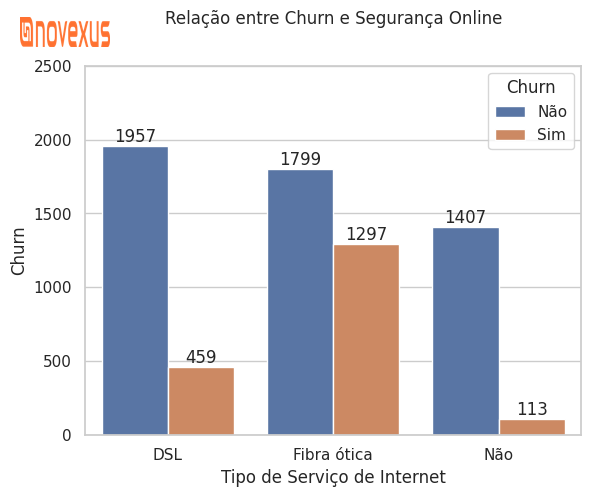

In [178]:
# Criação do Gráfico 1
ax = sns.countplot(data=df_tratado, x="Servico_internet", hue="Churn", palette="deep")
plt.title("Relação entre Churn e Segurança Online",pad=30)
plt.ylabel("Churn")
plt.xlabel("Tipo de Serviço de Internet")
ax.bar_label(ax.containers[0],fmt='%d', label_type='edge')
ax.bar_label(ax.containers[1],fmt='%d', label_type='edge')
plt.figimage(logo, 20, 450, alpha=1)

plt.ylim(0,2500)
plt.show()

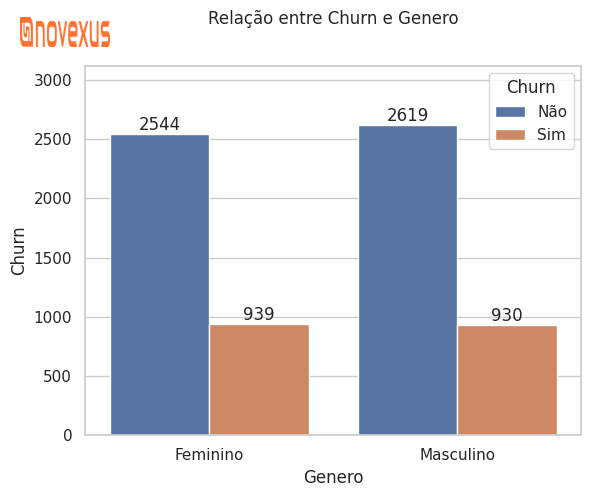

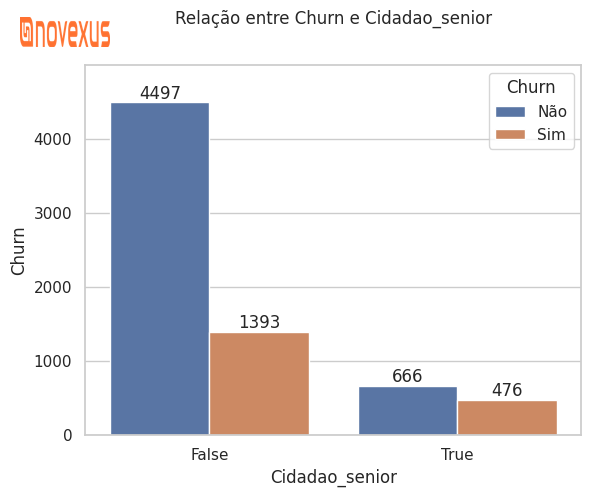

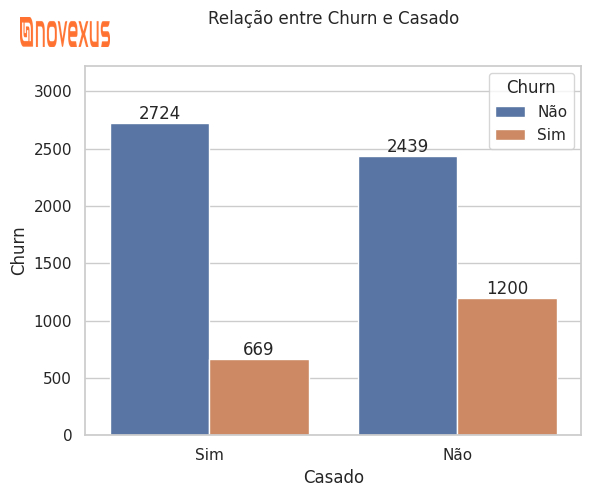

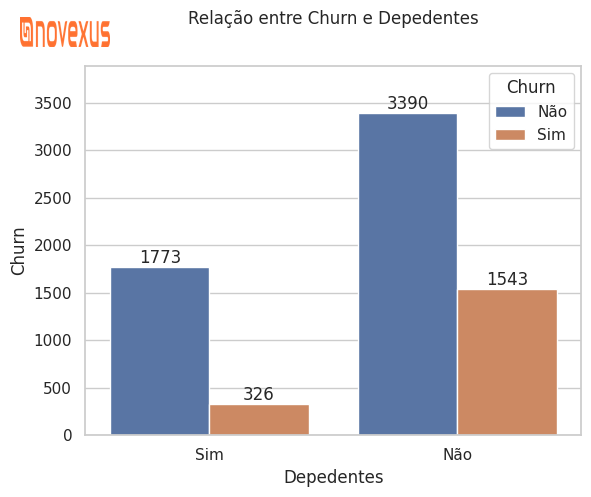

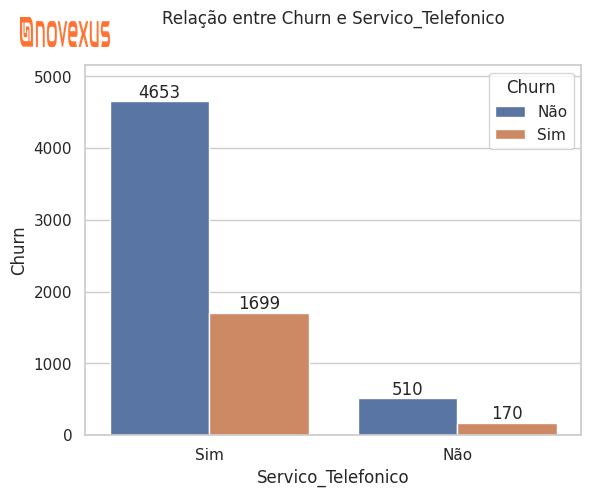

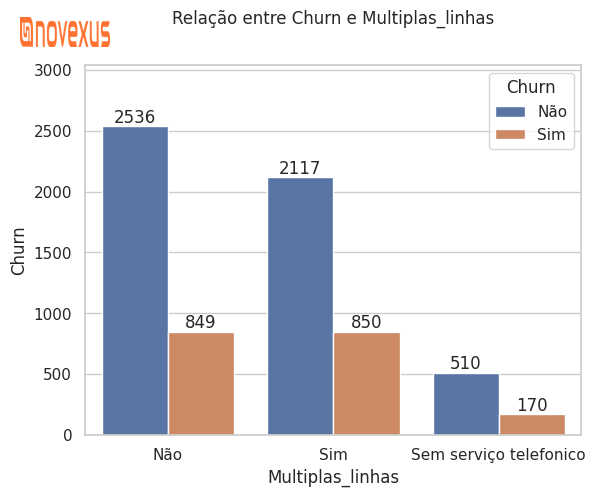

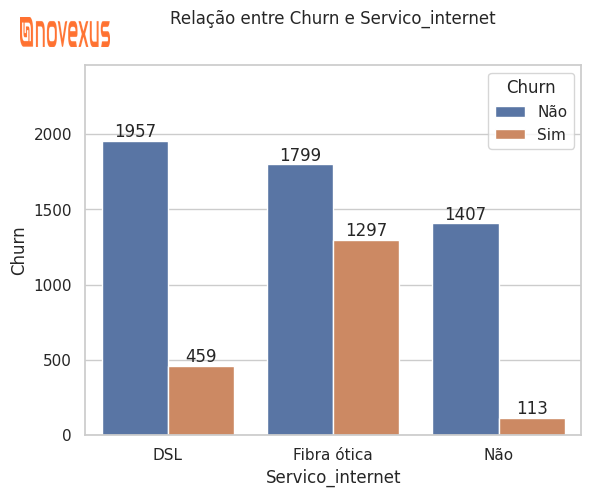

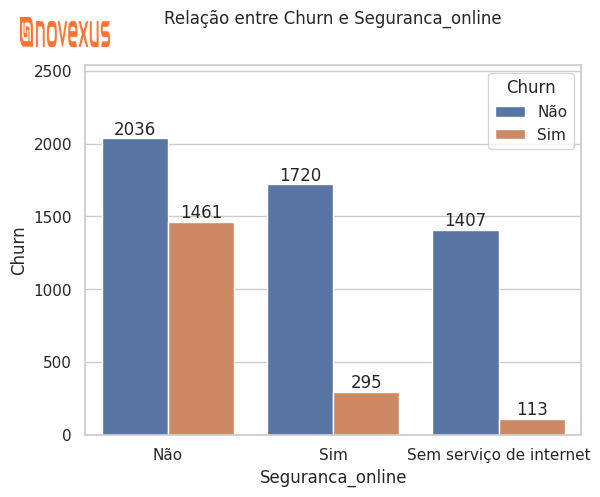

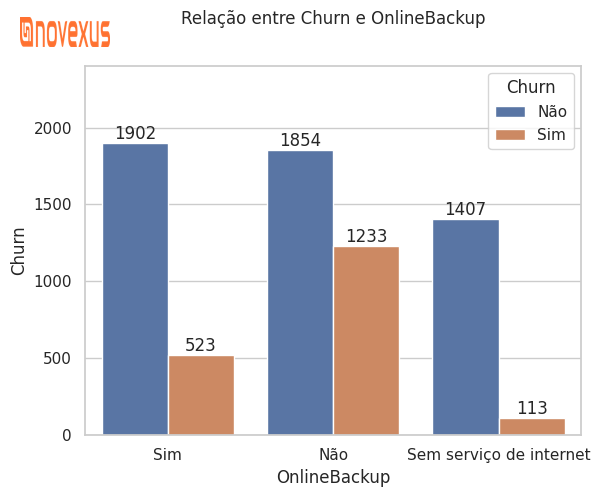

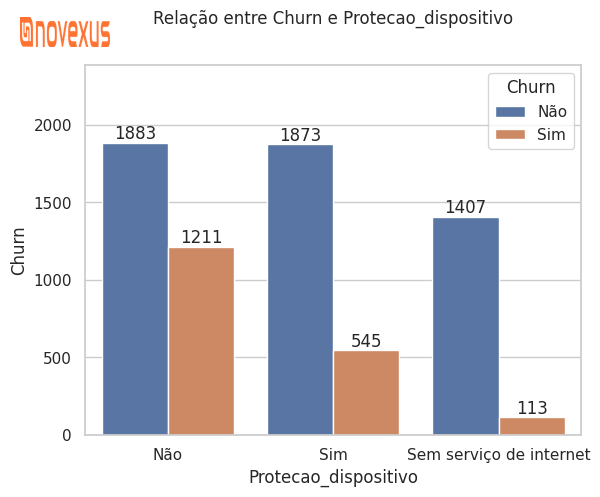

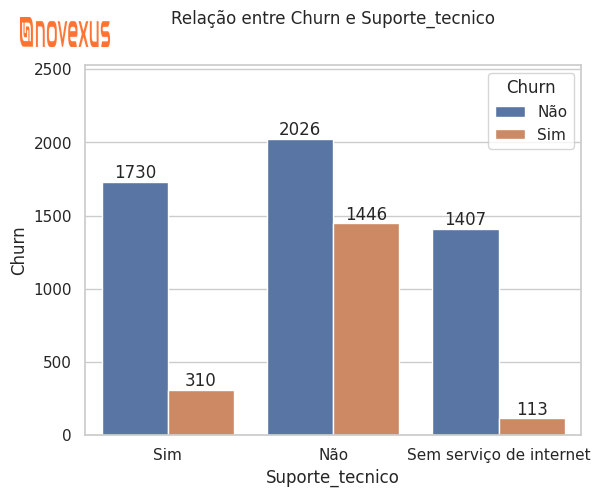

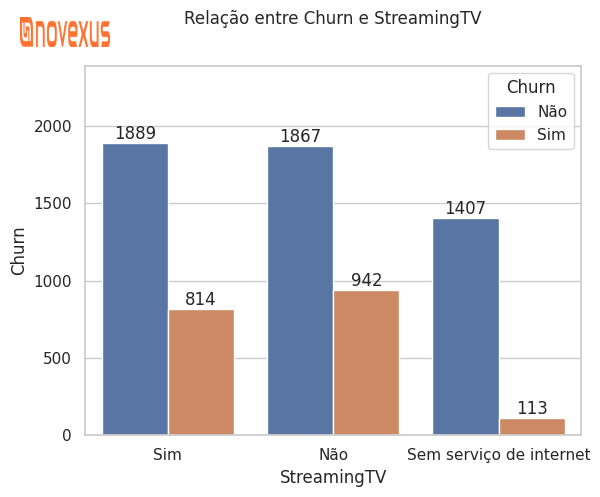

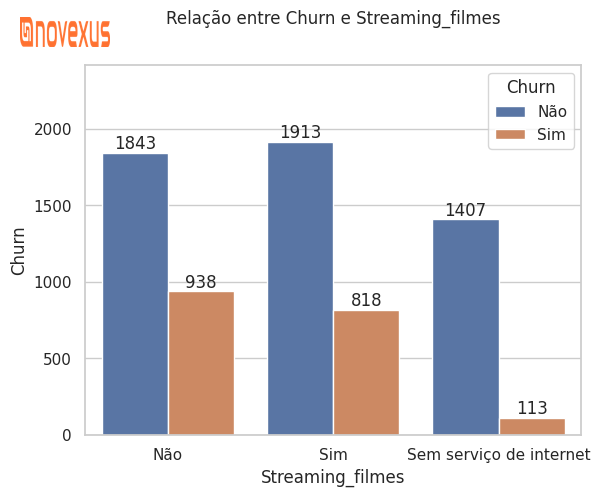

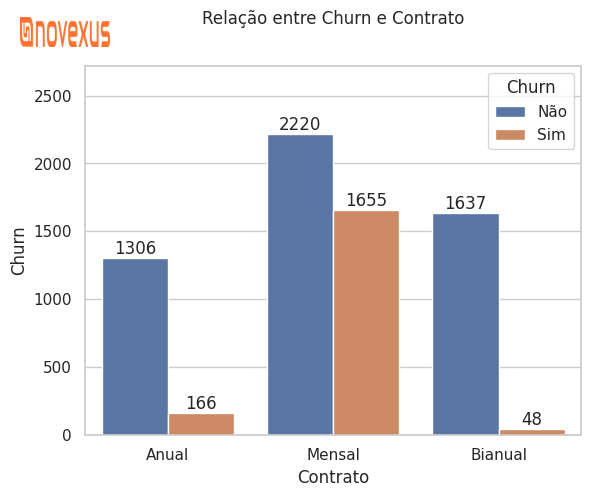

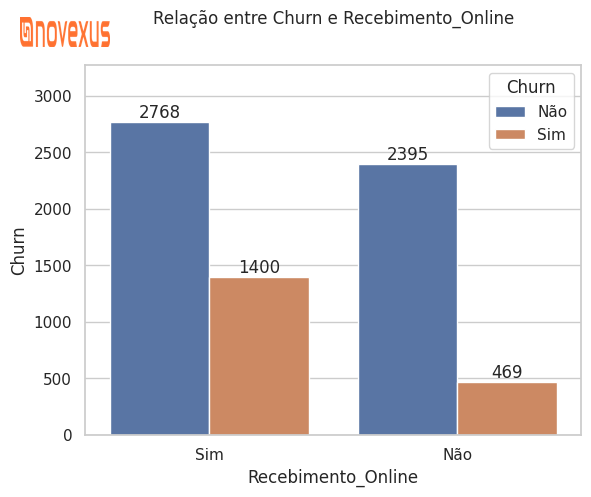

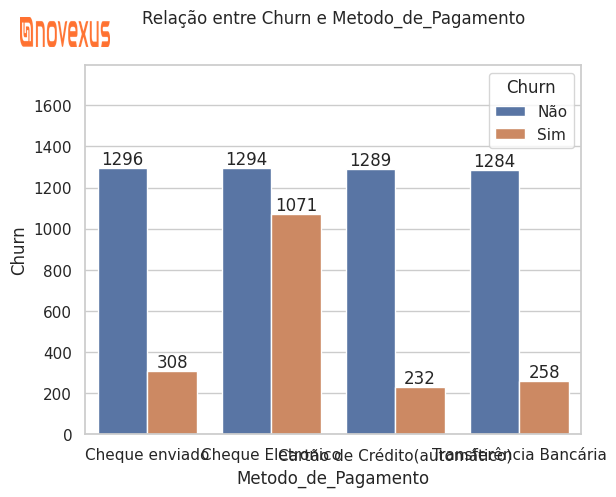

In [179]:
#Criação dos gráficos de barras dos parâmetros nominais por do Churn
for a in (df_tratado.columns)[2:19]:
 if a!= 'Meses_contrato':
  x_columns = a
  ax = sns.countplot(data=df_tratado, x=x_columns, hue="Churn", palette="deep")
  plt.title(f"Relação entre Churn e {a}",pad=30)
  plt.ylabel("Churn")
  plt.xlabel(f"{a}")
  ax.bar_label(ax.containers[0],fmt='%d', label_type='edge')
  ax.bar_label(ax.containers[1],fmt='%d', label_type='edge')
  plt.figimage(logo, 20, 450, alpha=1)
  max_yes = []
  max_no = []
  for z in df_tratado[a].unique():
    b = df_tratado[a].where((df_tratado['Churn']=='Não') & (df_tratado[a]==z)).count()
    c = df_tratado[a].where((df_tratado['Churn']=='Sim') & (df_tratado[a]==z)).count()
    max_yes.append(c)
    max_no.append(b)

  # Calcula o limite superior único para o eixo y
  y_upper_limit = max(max(max_yes), max(max_no)) + 500

  plt.ylim(0, y_upper_limit)
  plt.show()


### **Distruibuição da variável churn pelos parâmetros Numérico - Boxplot**

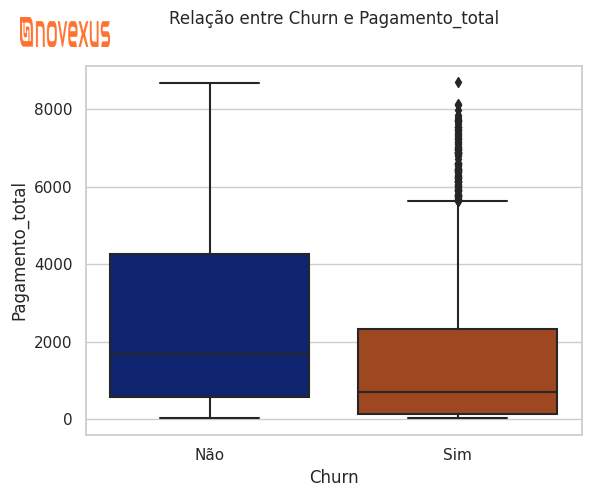

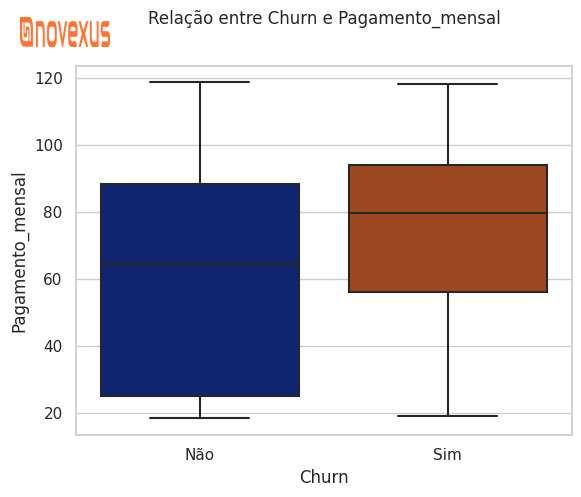

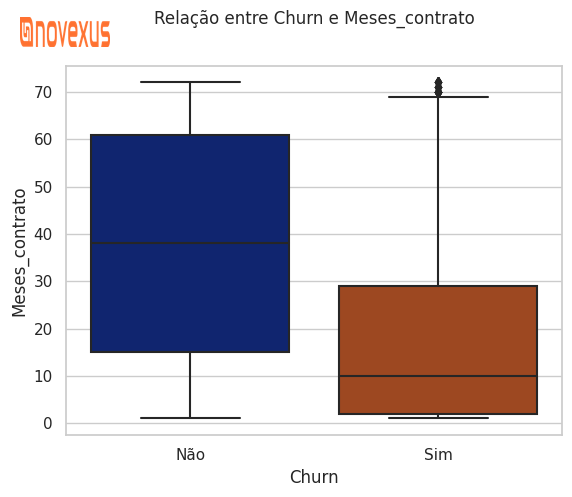

In [180]:
#Criação dos gráficos
for a in ['Pagamento_total','Pagamento_mensal','Meses_contrato']:
  ax=sns.boxplot(data=df_tratado, y=a, x="Churn")
  plt.title(f"Relação entre Churn e {a}",pad=30)
  plt.figimage(logo, 20, 450, alpha=1)
  plt.show()

### **Taxa de Churn**

#### **Taxa de Churn por total de Clientes na categoria**

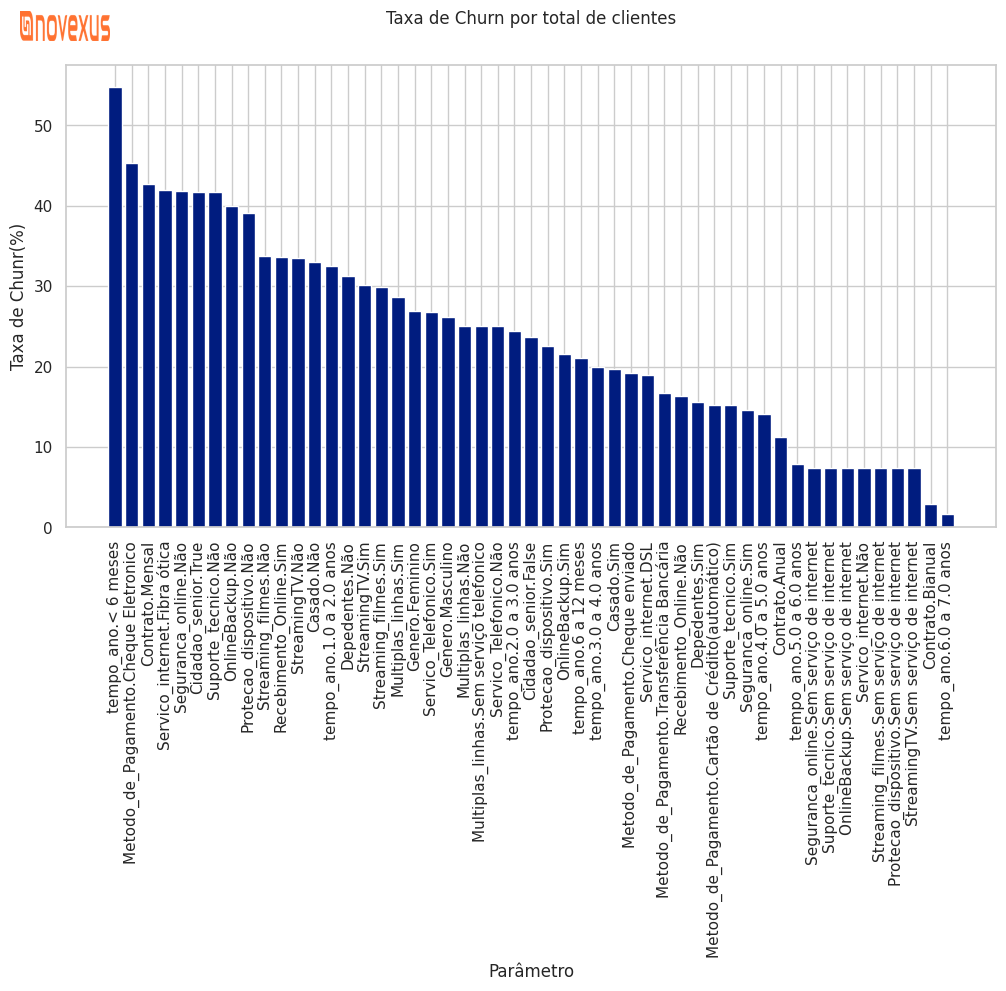

In [181]:
#Gráfico de Taxa de Churn por total de clientes agrupado

plt.figure(figsize=(12, 6))
# Ordenar os valores do DataFrame pelo índice máximo (assumindo que é o índice 0 neste caso)
sorted_df = df_est.T.sort_values(by='Taxa_c_clientes', ascending=False)

ax = plt.bar(data=sorted_df,x=sorted_df.index,height='Taxa_c_clientes',width=0.8)
plt.title("Taxa de Churn por total de clientes",pad=30)
plt.ylabel("Taxa de Chunr(%)")
plt.xlabel("Parâmetro")

plt.figimage(logo, 20, 950, alpha=1)
plt.xticks(rotation='vertical')
plt.show()

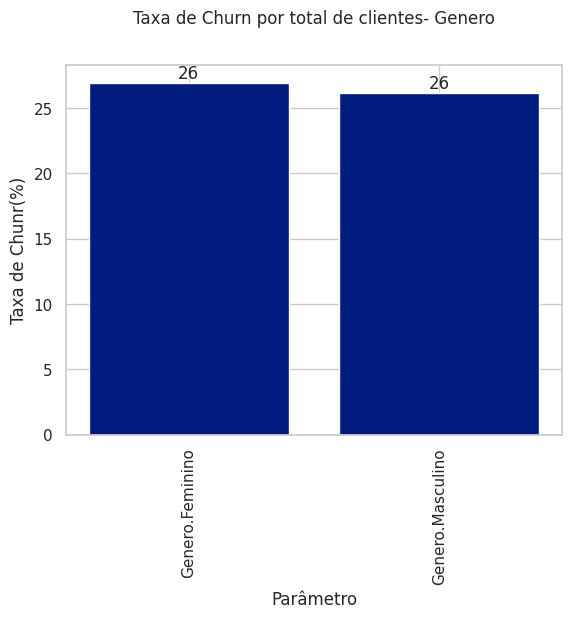

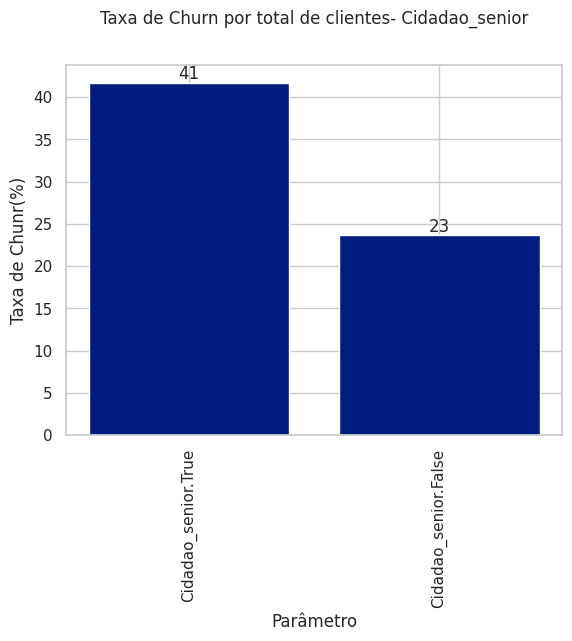

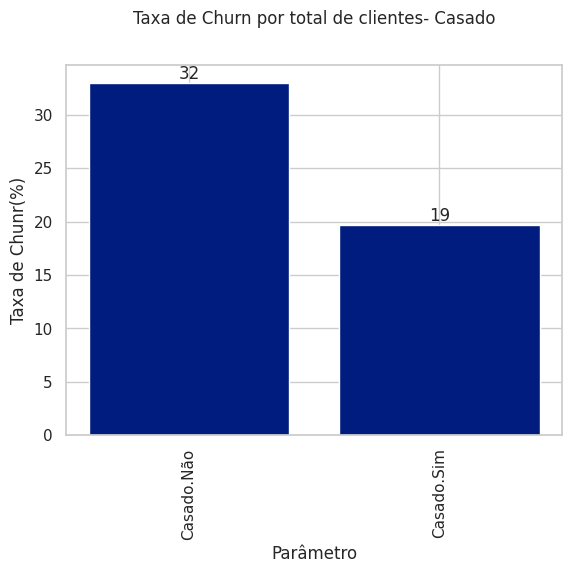

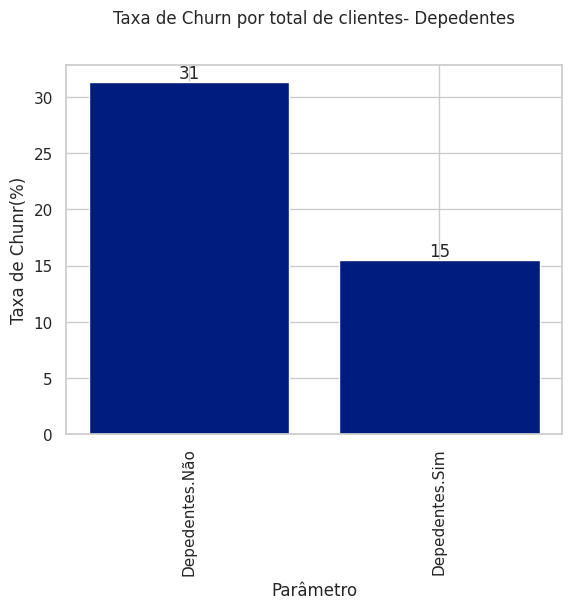

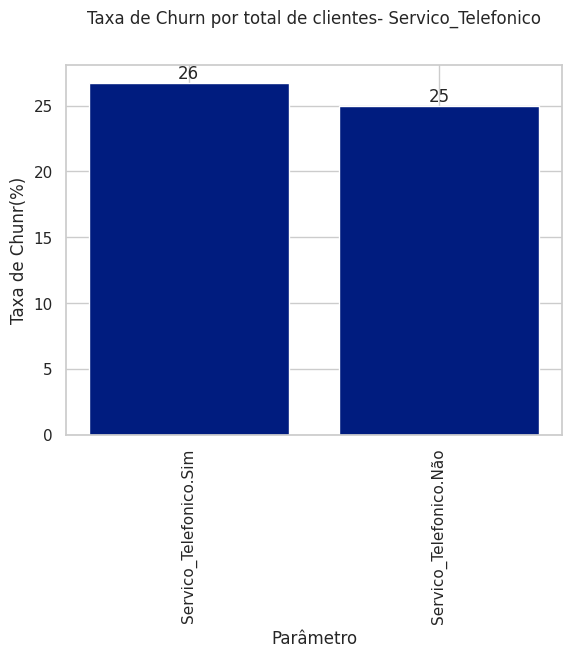

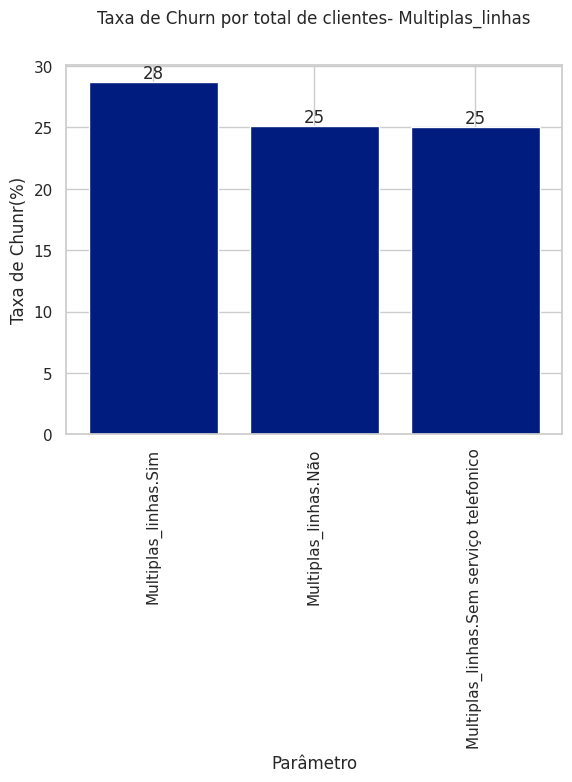

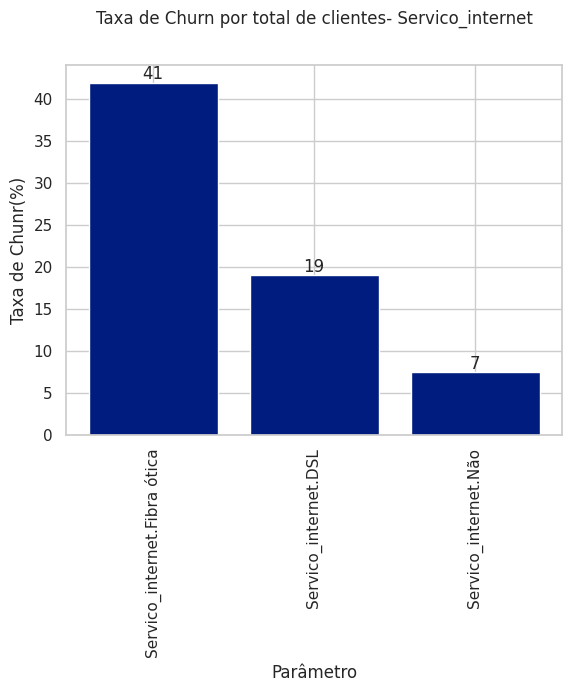

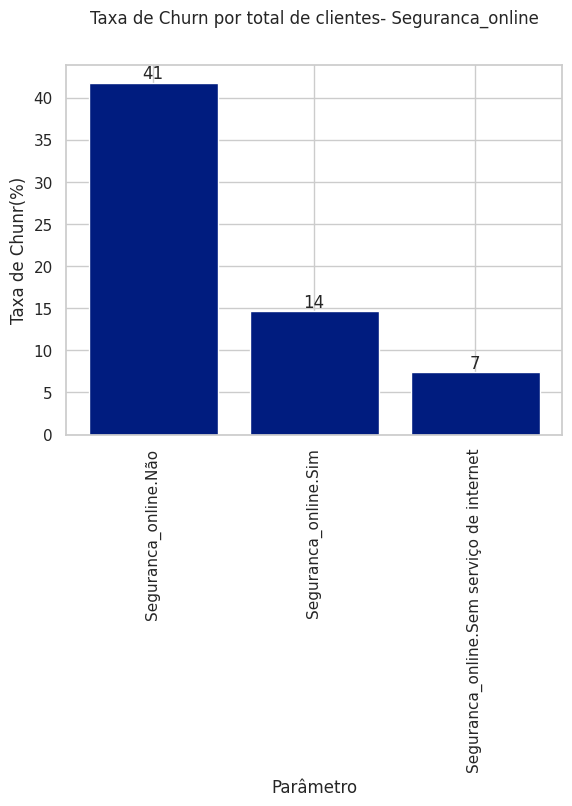

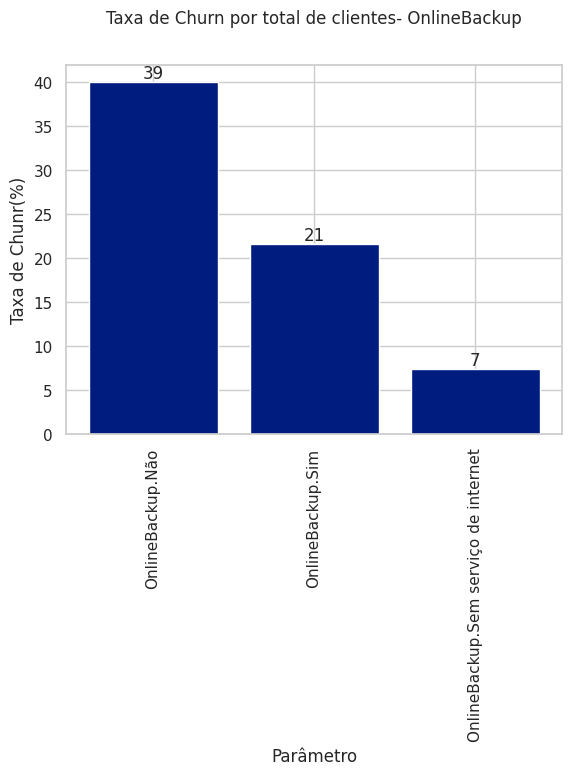

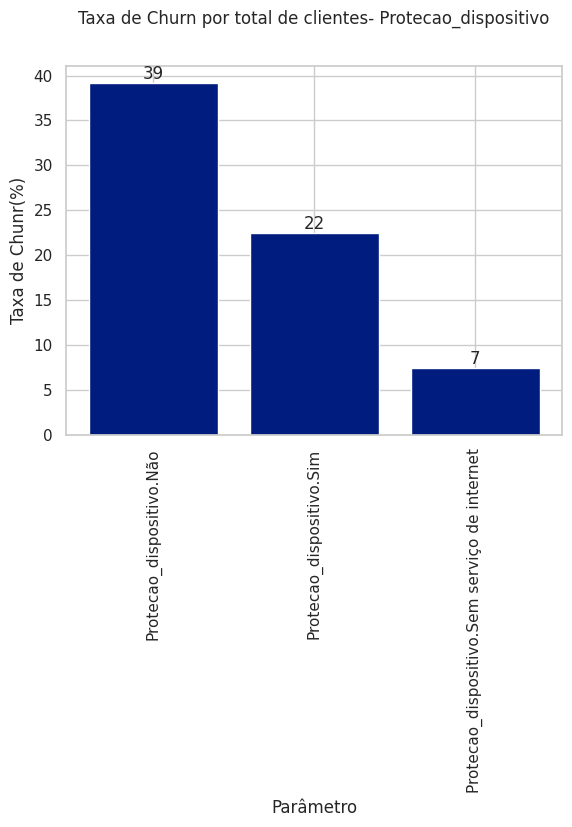

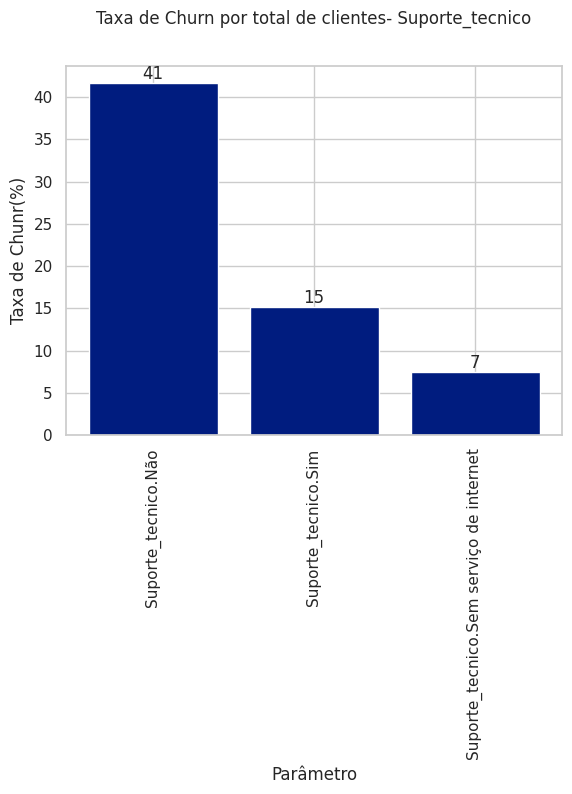

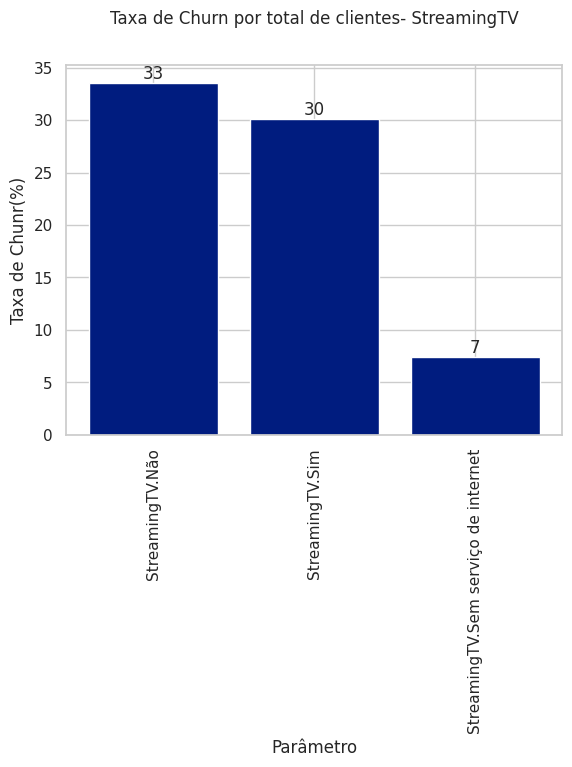

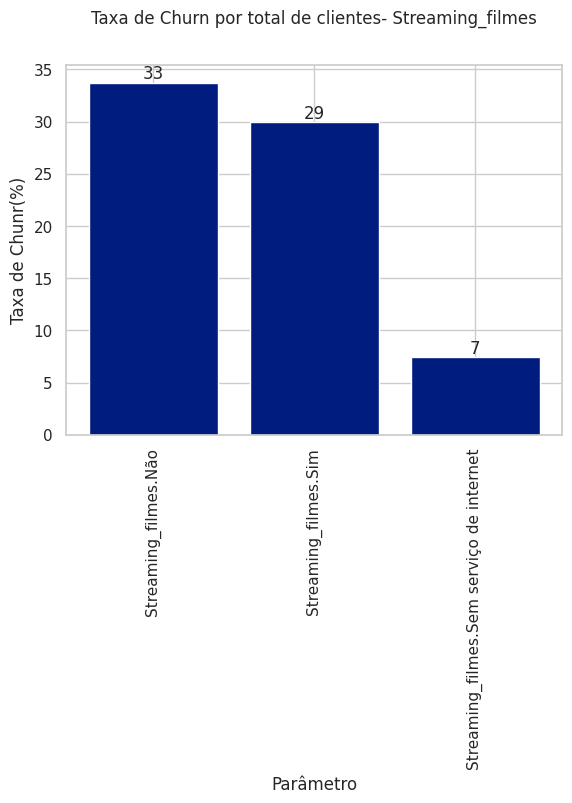

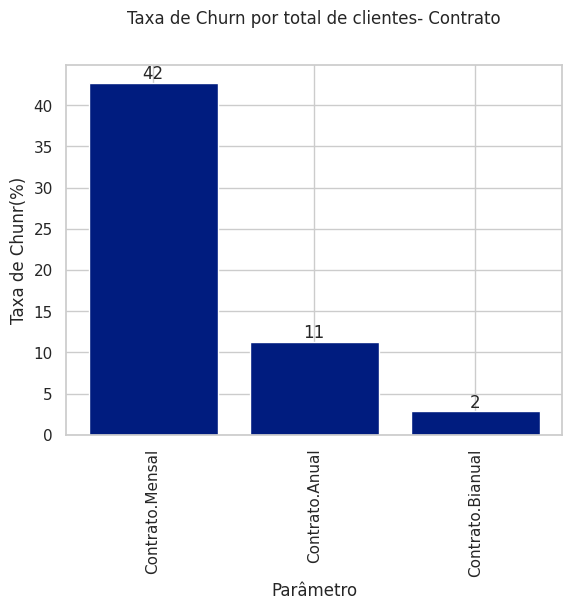

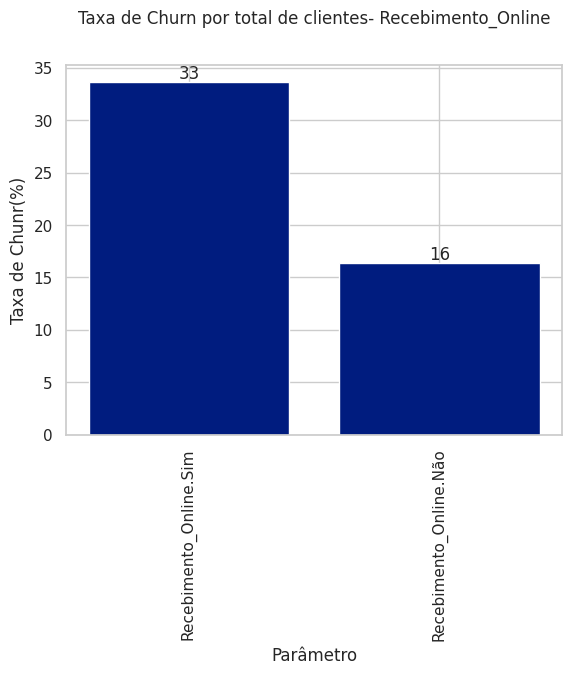

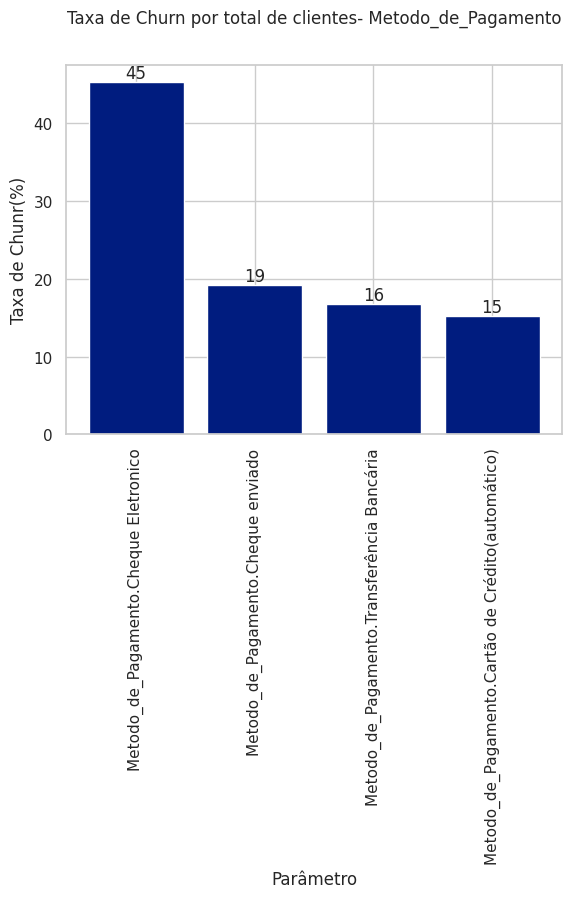

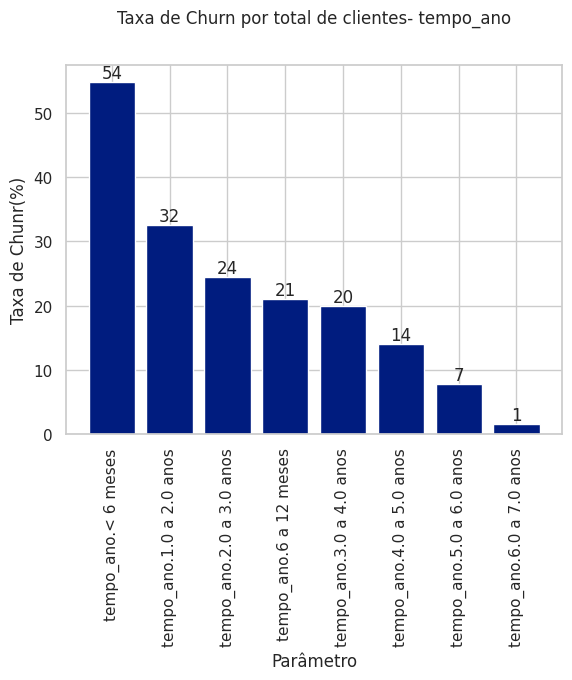

In [182]:
#Taxa de churn por coluna

for a in df_tratado.select_dtypes(include=('string','bool')).columns[2:]:
 sorted_df = df_est.filter(like =a).T.sort_values(by='Taxa_c_clientes', ascending=False)

 ax = plt.bar(sorted_df.index, sorted_df['Taxa_c_clientes'],width=0.8)
 plt.title(f"Taxa de Churn por total de clientes- {a}",pad=30)
 plt.ylabel("Taxa de Chunr(%)")
 plt.xlabel("Parâmetro")
 plt.bar_label(ax,fmt='%d', label_type='edge')
 plt.xticks(rotation='vertical')
 plt.show()

#### Taxa de Churn por total de Churns

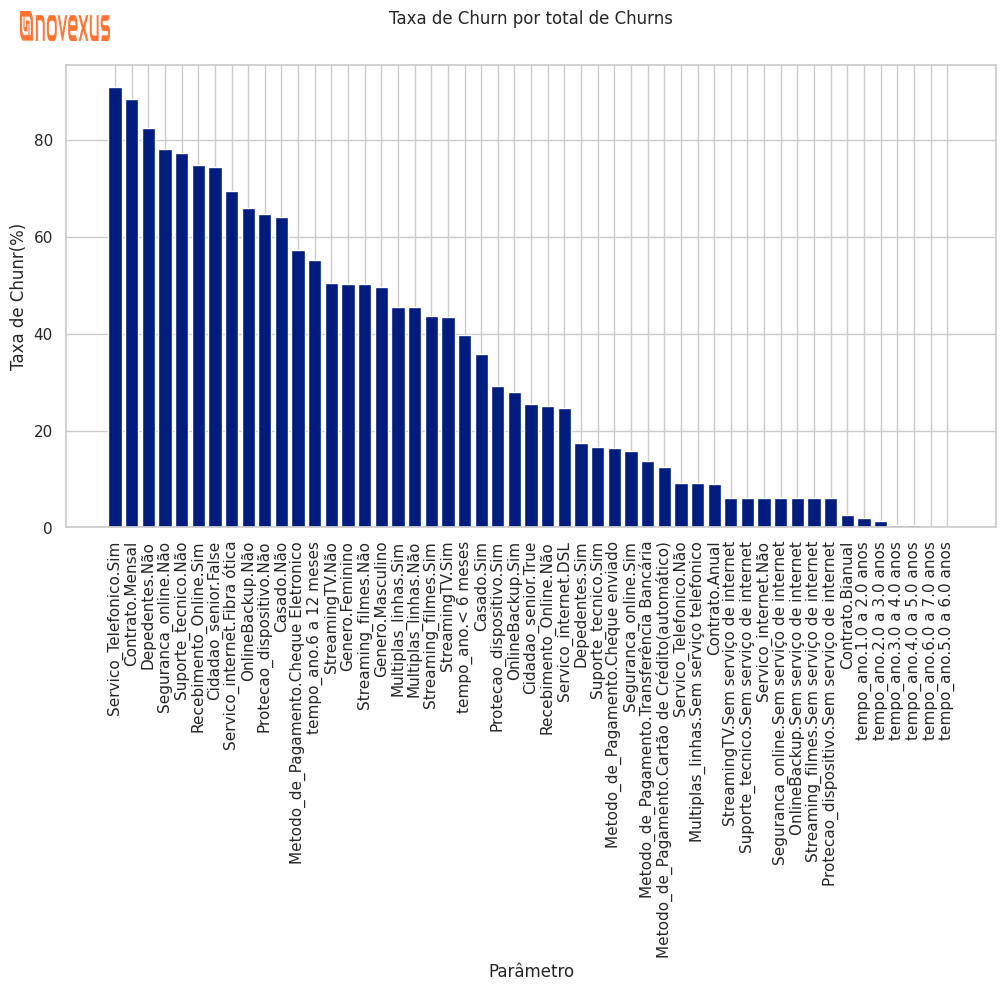

In [183]:
#Gráfico de Taxa de Churn por total de clientes agrupado

plt.figure(figsize=(12, 6))
# Ordenar os valores do DataFrame pelo índice máximo (assumindo que é o índice 0 neste caso)
sorted_df = df_est.T.sort_values(by='Taxa_c_churn', ascending=False)

ax = plt.bar(data=sorted_df,x=sorted_df.index,height='Taxa_c_churn',width=0.8)
plt.title("Taxa de Churn por total de Churns",pad=30)
plt.ylabel("Taxa de Chunr(%)")
plt.xlabel("Parâmetro")

plt.figimage(logo, 20, 950, alpha=1)
plt.xticks(rotation='vertical')
plt.show()

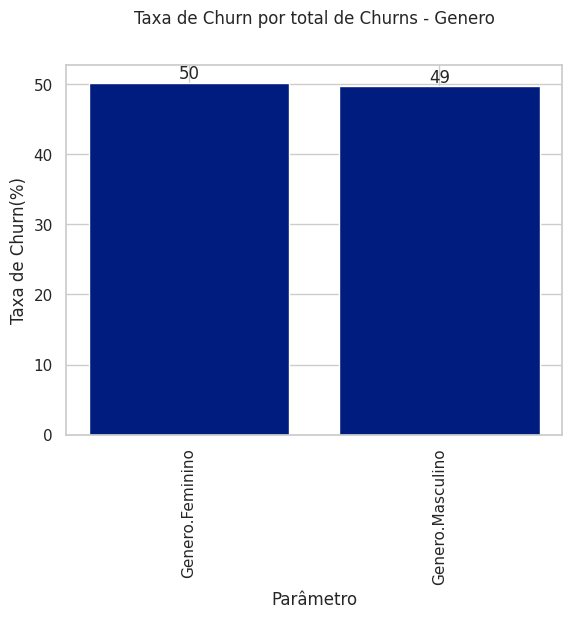

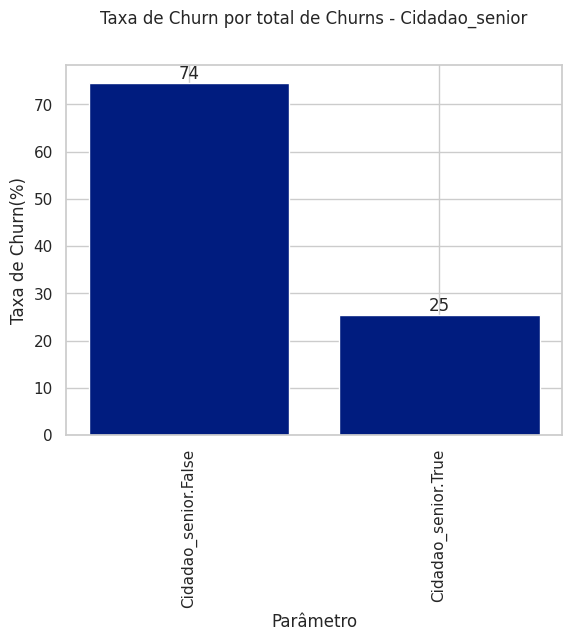

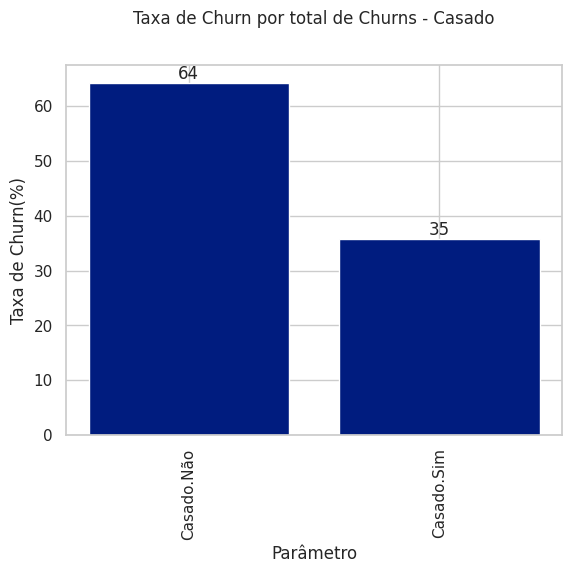

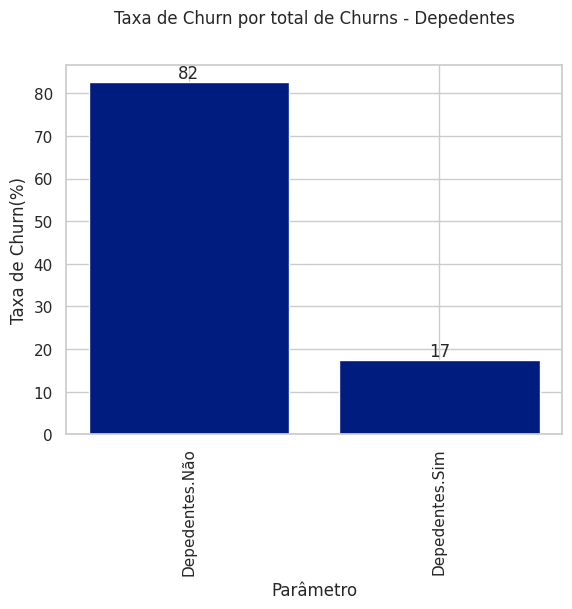

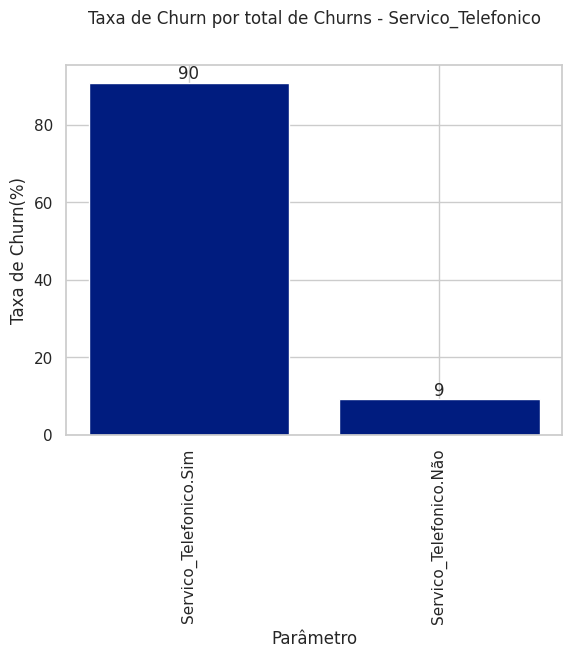

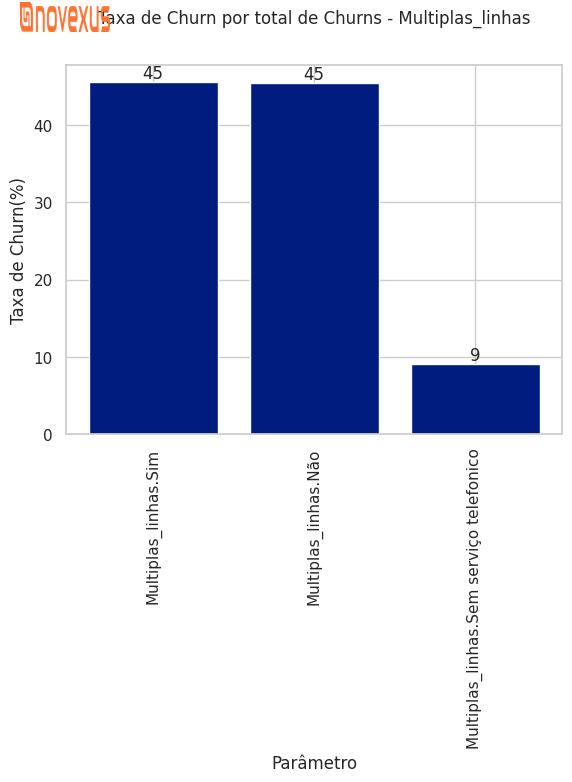

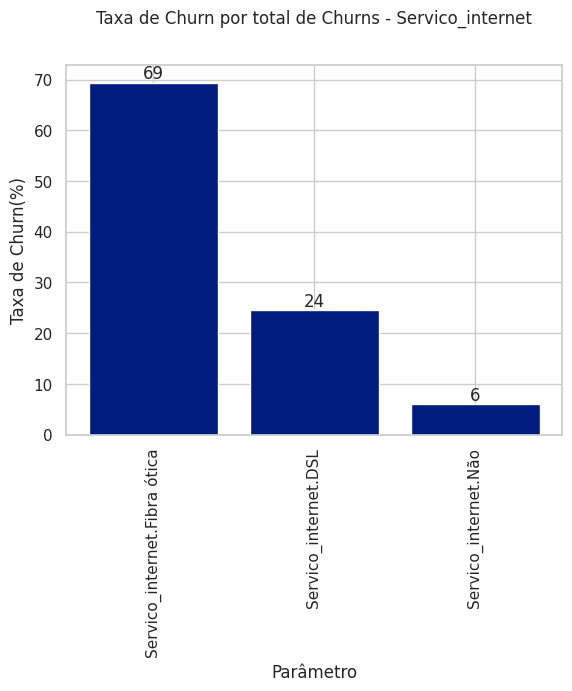

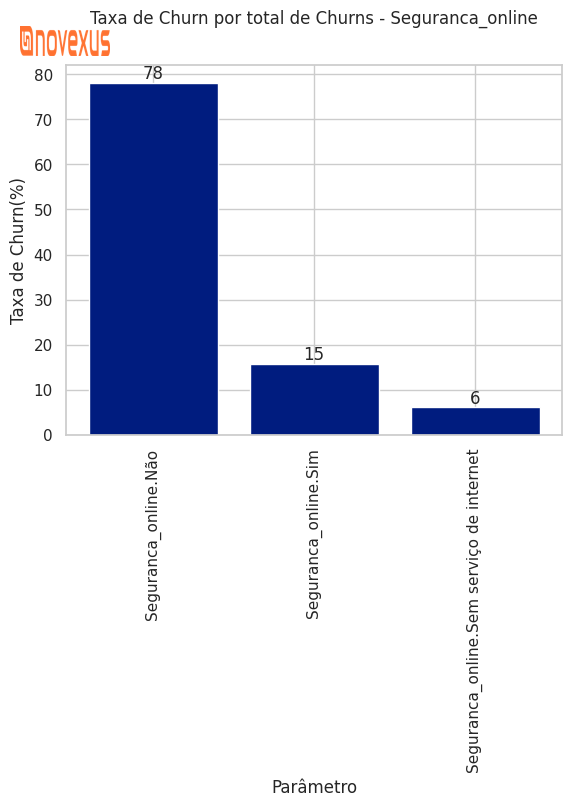

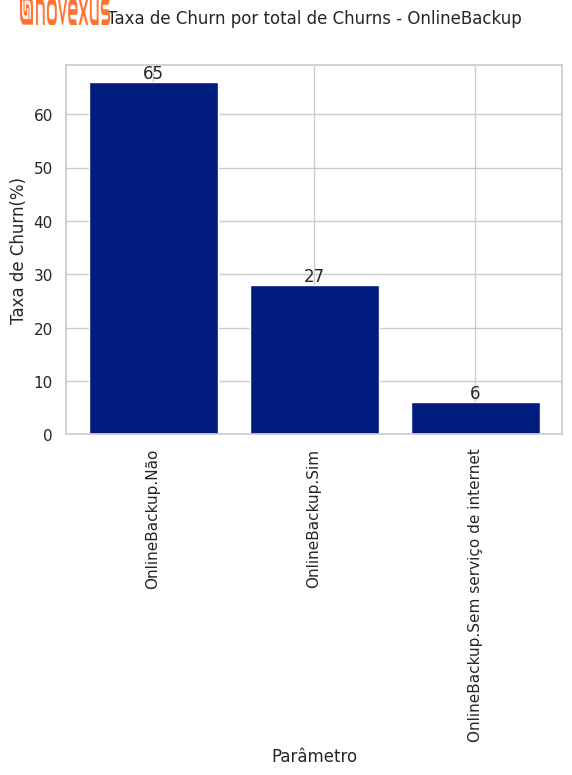

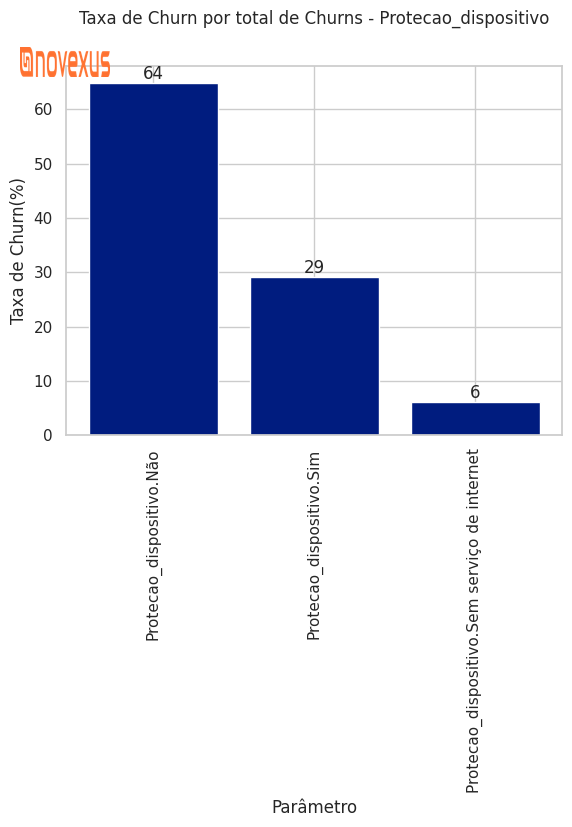

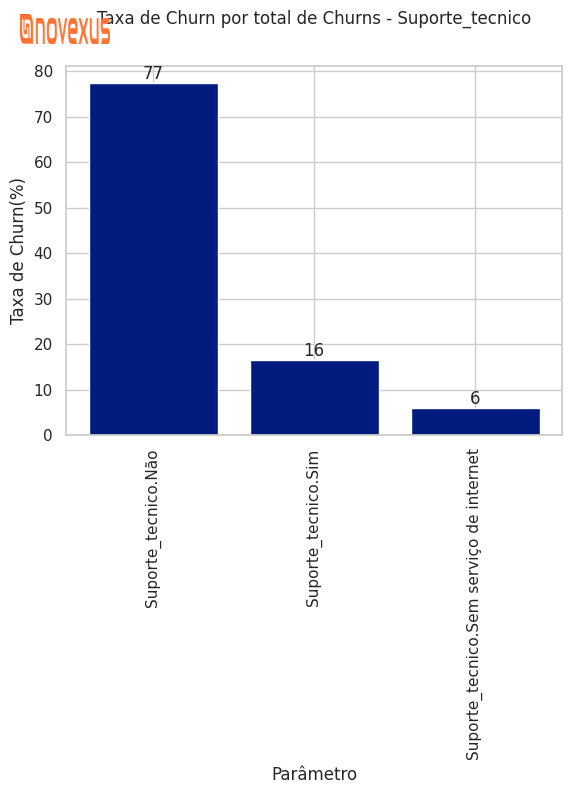

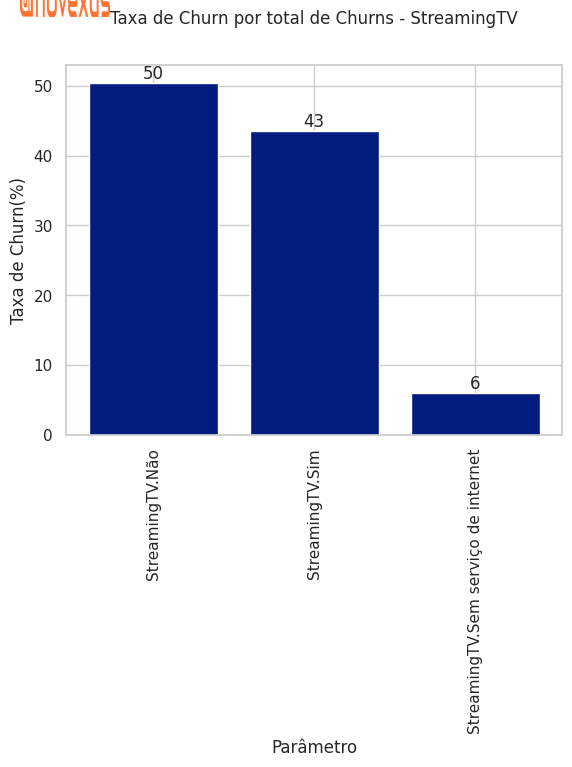

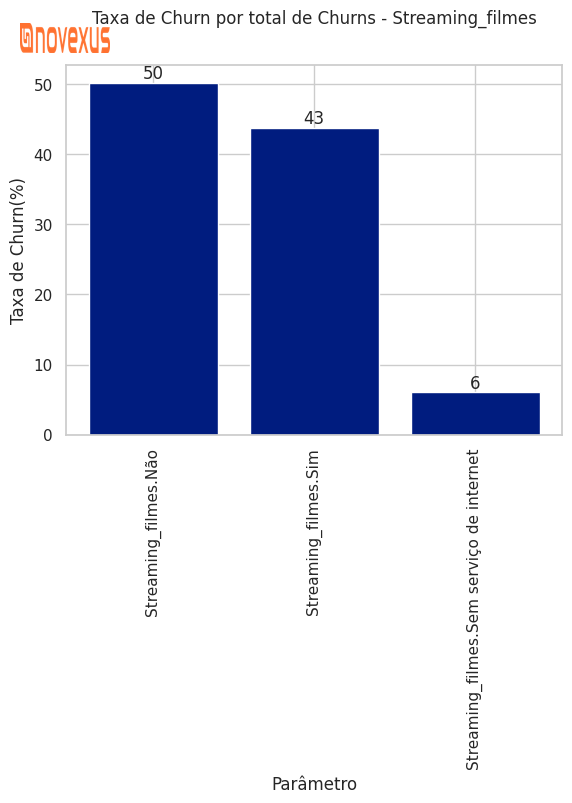

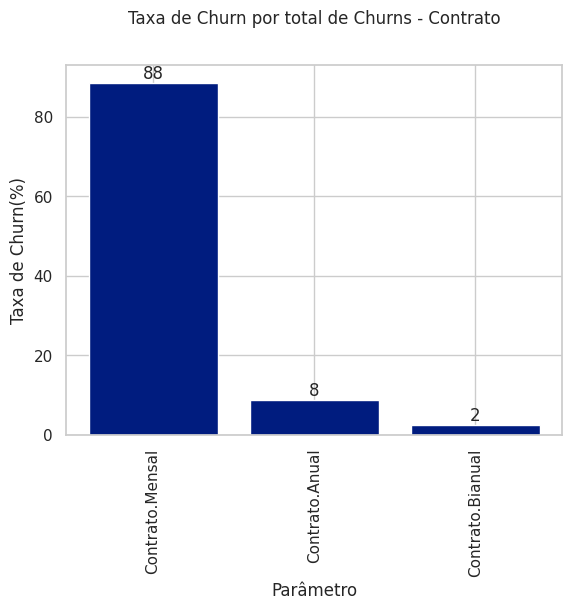

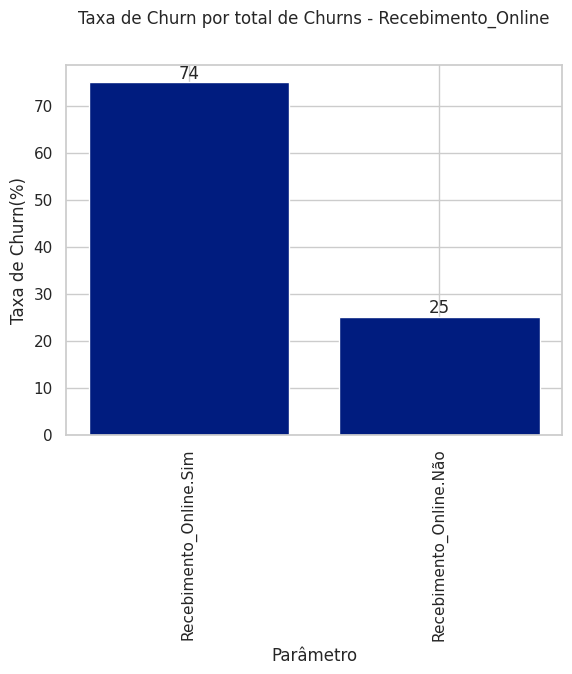

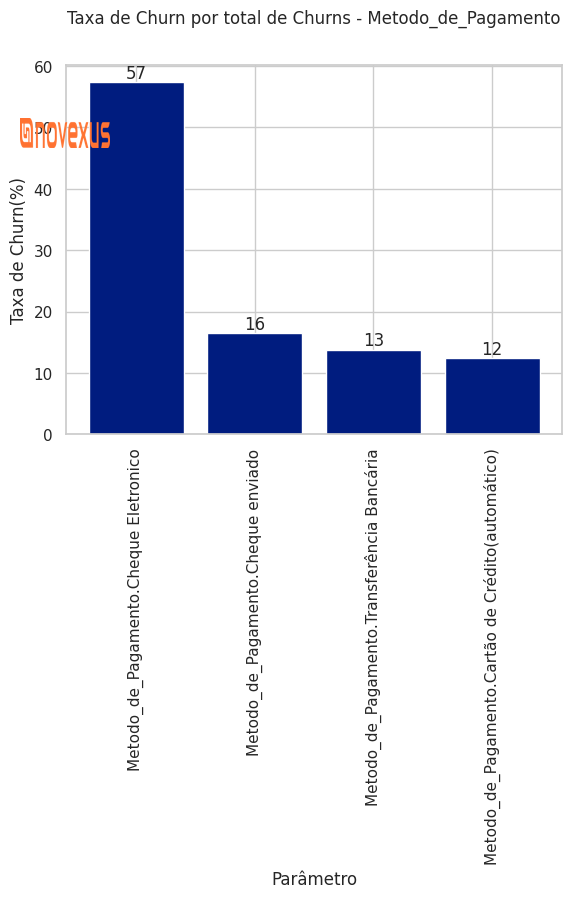

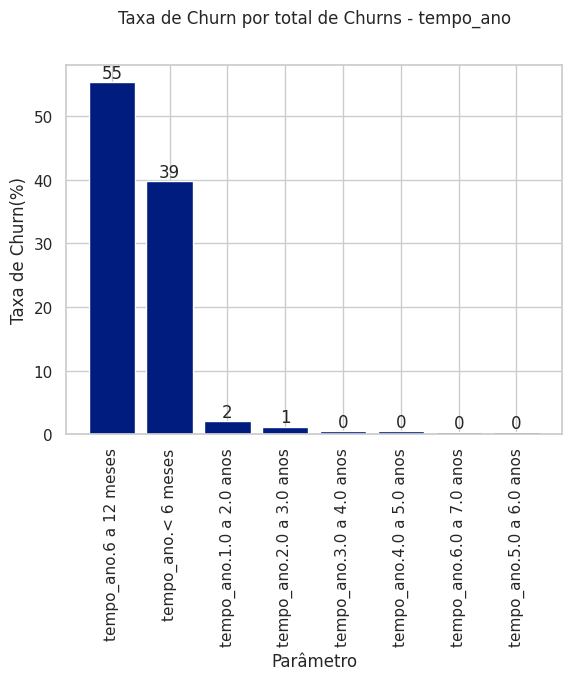

In [184]:
#Taxa de churn por coluna

for a in df_tratado.select_dtypes(include=('string','bool')).columns[2:]:
 sorted_df = df_est.filter(like =a).T.sort_values(by='Taxa_c_churn', ascending=False)

 ax = plt.bar(sorted_df.index, sorted_df['Taxa_c_churn'],width=0.8)
 plt.title(f"Taxa de Churn por total de Churns - {a}",pad=30)
 plt.ylabel("Taxa de Churn(%)")
 plt.xlabel("Parâmetro")
 plt.bar_label(ax,fmt='%d', label_type='edge')
 plt.figimage(logo, 20, 750, alpha=1)
 plt.xticks(rotation='vertical')
 plt.show()

### **Histogramas Churn**

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


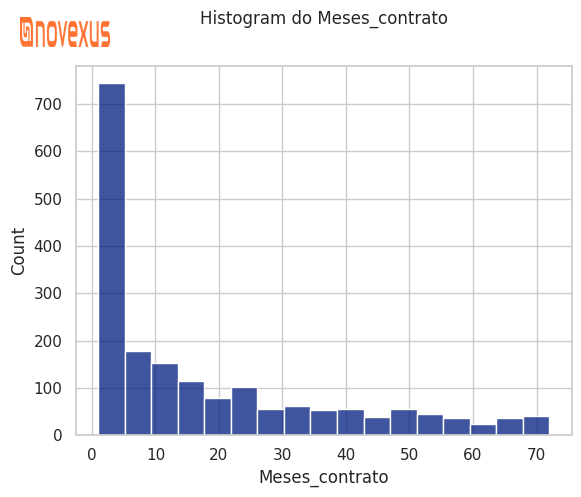

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


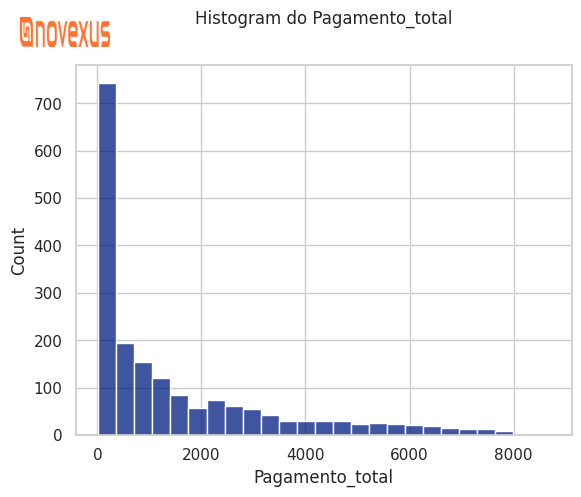

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


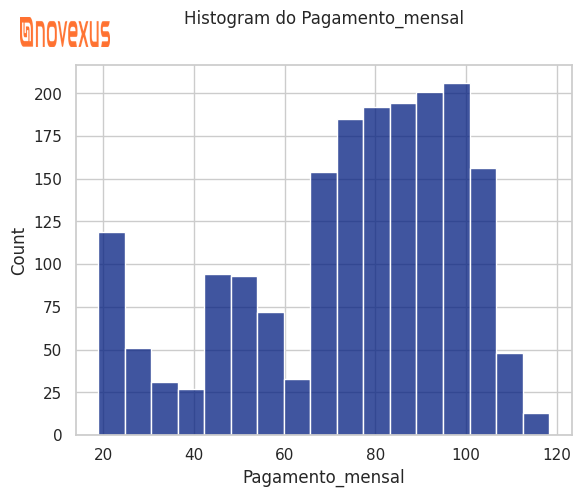

In [185]:
for a in ['Meses_contrato','Pagamento_total','Pagamento_mensal']:
 df_filtratado=df_tratado[(df_tratado['Churn']=='Sim')]
 ax =sns.histplot(data=df_filtratado,x=a)
 plt.title(f"Histogram do {a}",pad=30)
 plt.figimage(logo, 20, 450, alpha=1)
 plt.show()

# **Semana 2**

In [190]:
#Criando DataFrame para criação de modelos de machine learn
df_MA = df_tratado

## **Transformar as variáveis categóricas binárias**

In [191]:
#Dicionário de transformação
sim1_nao0 = {'Sim':1,'Não':0}

#Fazendo transformações
for a in df_MA.columns:
 if 'Sim' in df_MA[a].unique():
  df_MA[a]=df_MA[a].map(sim1_nao0)

#Verificando itens nas colunas
for a in df_tratado.columns[1:]:
  print(a,list(df_tratado[a].unique()))

Churn [0, 1]
Genero ['Feminino', 'Masculino']
Cidadao_senior [False, True]
Casado [1, 0]
Depedentes [1, 0]
Meses_contrato [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34, 1, 45, 50, 23, 55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27, 2, 25, 29, 14, 35, 64, 39, 40, 11, 6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44, 22, 24, 19, 47, 62, 46, 52, 8, 60, 48, 28, 41, 53, 68, 31, 36, 17, 18, 51, 38, 42]
Servico_Telefonico [1, 0]
Multiplas_linhas [0.0, 1.0, nan]
Servico_internet ['DSL', 'Fibra ótica', 'Não']
Seguranca_online [0.0, 1.0, nan]
OnlineBackup [1.0, 0.0, nan]
Protecao_dispositivo [0.0, 1.0, nan]
Suporte_tecnico [1.0, 0.0, nan]
StreamingTV [1.0, 0.0, nan]
Streaming_filmes [0.0, 1.0, nan]
Contrato ['Anual', 'Mensal', 'Bianual']
Recebimento_Online [1, 0]
Metodo_de_Pagamento ['Cheque enviado', 'Cheque Eletronico', 'Cartão de Crédito(automático)', 'Transferência Bancária']
Pagamento_mensal [65.6, 59.9, 73.9, 98.0, 83.9, 69.4, 109.7, 84.65, 48.2, 90.45, 45.2, 116.8, 68.95, 101.3, 45.05, 

In [140]:
#Verificando itens nas colunas
df_tratado['Casado']=df_tratado['Casado'].map(sim1_nao0)
df_tratado['Depedentes']=df_tratado['Depedentes'].map(sim1_nao0)
df_tratado['Servico_Telefonico']=df_tratado['Servico_Telefonico'].map(sim1_nao0)
df_tratado['Recebimento_Online']=df_tratado['Recebimento_Online'].map(sim1_nao0)
for a in df_MA.columns[1:]:
  print(a,list(df_MA[a].unique()))

Churn ['Não', 'Sim']
Genero ['Feminino', 'Masculino']
Cidadao_senior [False, True]
Casado ['Sim', 'Não']
Depedentes ['Sim', 'Não']
Meses_contrato [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34, 1, 45, 50, 23, 55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27, 2, 25, 29, 14, 35, 64, 39, 40, 11, 6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44, 22, 24, 19, 47, 62, 46, 52, 8, 60, 48, 28, 41, 53, 68, 31, 36, 17, 18, 51, 38, 42]
Servico_Telefonico ['Sim', 'Não']
Multiplas_linhas ['Não', 'Sim', 'Sem serviço telefonico']
Servico_internet ['DSL', 'Fibra ótica', 'Não']
Seguranca_online ['Não', 'Sim', 'Sem serviço de internet']
OnlineBackup ['Sim', 'Não', 'Sem serviço de internet']
Protecao_dispositivo ['Não', 'Sim', 'Sem serviço de internet']
Suporte_tecnico ['Sim', 'Não', 'Sem serviço de internet']
StreamingTV ['Sim', 'Não', 'Sem serviço de internet']
Streaming_filmes ['Não', 'Sim', 'Sem serviço de internet']
Contrato ['Anual', 'Mensal', 'Bianual']
Recebimento_Online ['Sim', 'Não']
Metodo_de_Pag